In [7]:
!pip3 install yfinance

In [8]:
import pandas as pd
import yfinance as yf
import numpy as np

In [18]:
df = yf.download("BTC-USD", start='2020-08-01')

[*********************100%%**********************]  1 of 1 completed


In [19]:
def strategy(df, window=1):
    df = df.copy()
    df['ret'] = np.log(df.Close.pct_change() + 1)
    df['prior_n'] = df.ret.rolling(window).sum()
    df.dropna(inplace=True)
    df['position']=[1 if i > 0 else -1 for i in df.prior_n]
    df['strat'] = df.position.shift(1) * df.ret
    return np.exp(df[['ret','strat']].cumsum()).plot(figsize=(12,6))

<AxesSubplot:xlabel='Date'>

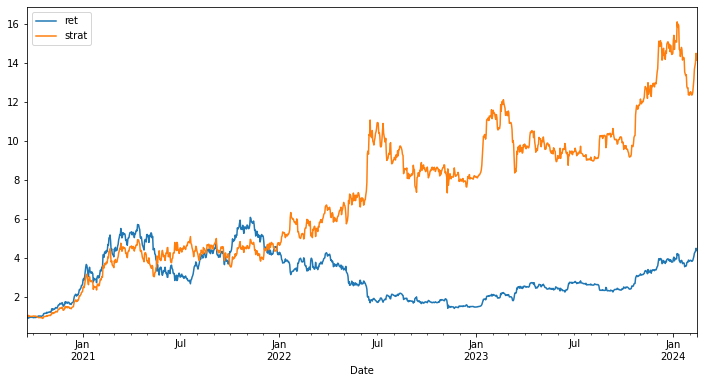

In [24]:
strategy(df,50)

In [25]:
#Intraday

In [29]:
df1 = yf.download('BTC-USD',start='2021-08-16',interval='1m')

[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['BTC-USD']: Exception('%ticker%: 1m data not available for startTime=1629072000 and endTime=1707838324. Only 7 days worth of 1m granularity data are allowed to be fetched per request.')


<AxesSubplot:xlabel='Date'>

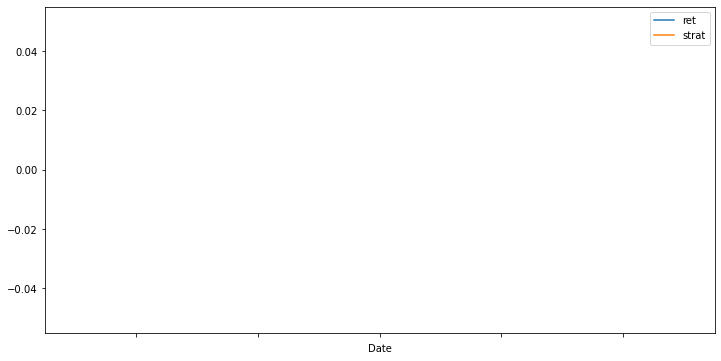

In [30]:
strategy(df1)